In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # For missing value visualization

# For machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# For linear regression assumption checks
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [2]:
# Load the dataset
# The '?' character is used for missing values, so we'll tell pandas to recognize it.
file_path = 'Auto-Data.csv'
data = pd.read_csv(file_path, na_values='?')

# Get the dimensions of the dataset (rows, columns)
print(f"Dataset shape: {data.shape}")

# See the data types and non-null counts
print("\n--- Data Info ---")
data.info()

# Display the first 5 rows
print("\n--- First 5 Rows ---")
display(data.head())

# Get a statistical summary of numerical columns
print("\n--- Statistical Summary ---")
display(data.describe())

Dataset shape: (205, 26)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-nul

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0



--- Statistical Summary ---


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


--- Missing Value Matrix ---


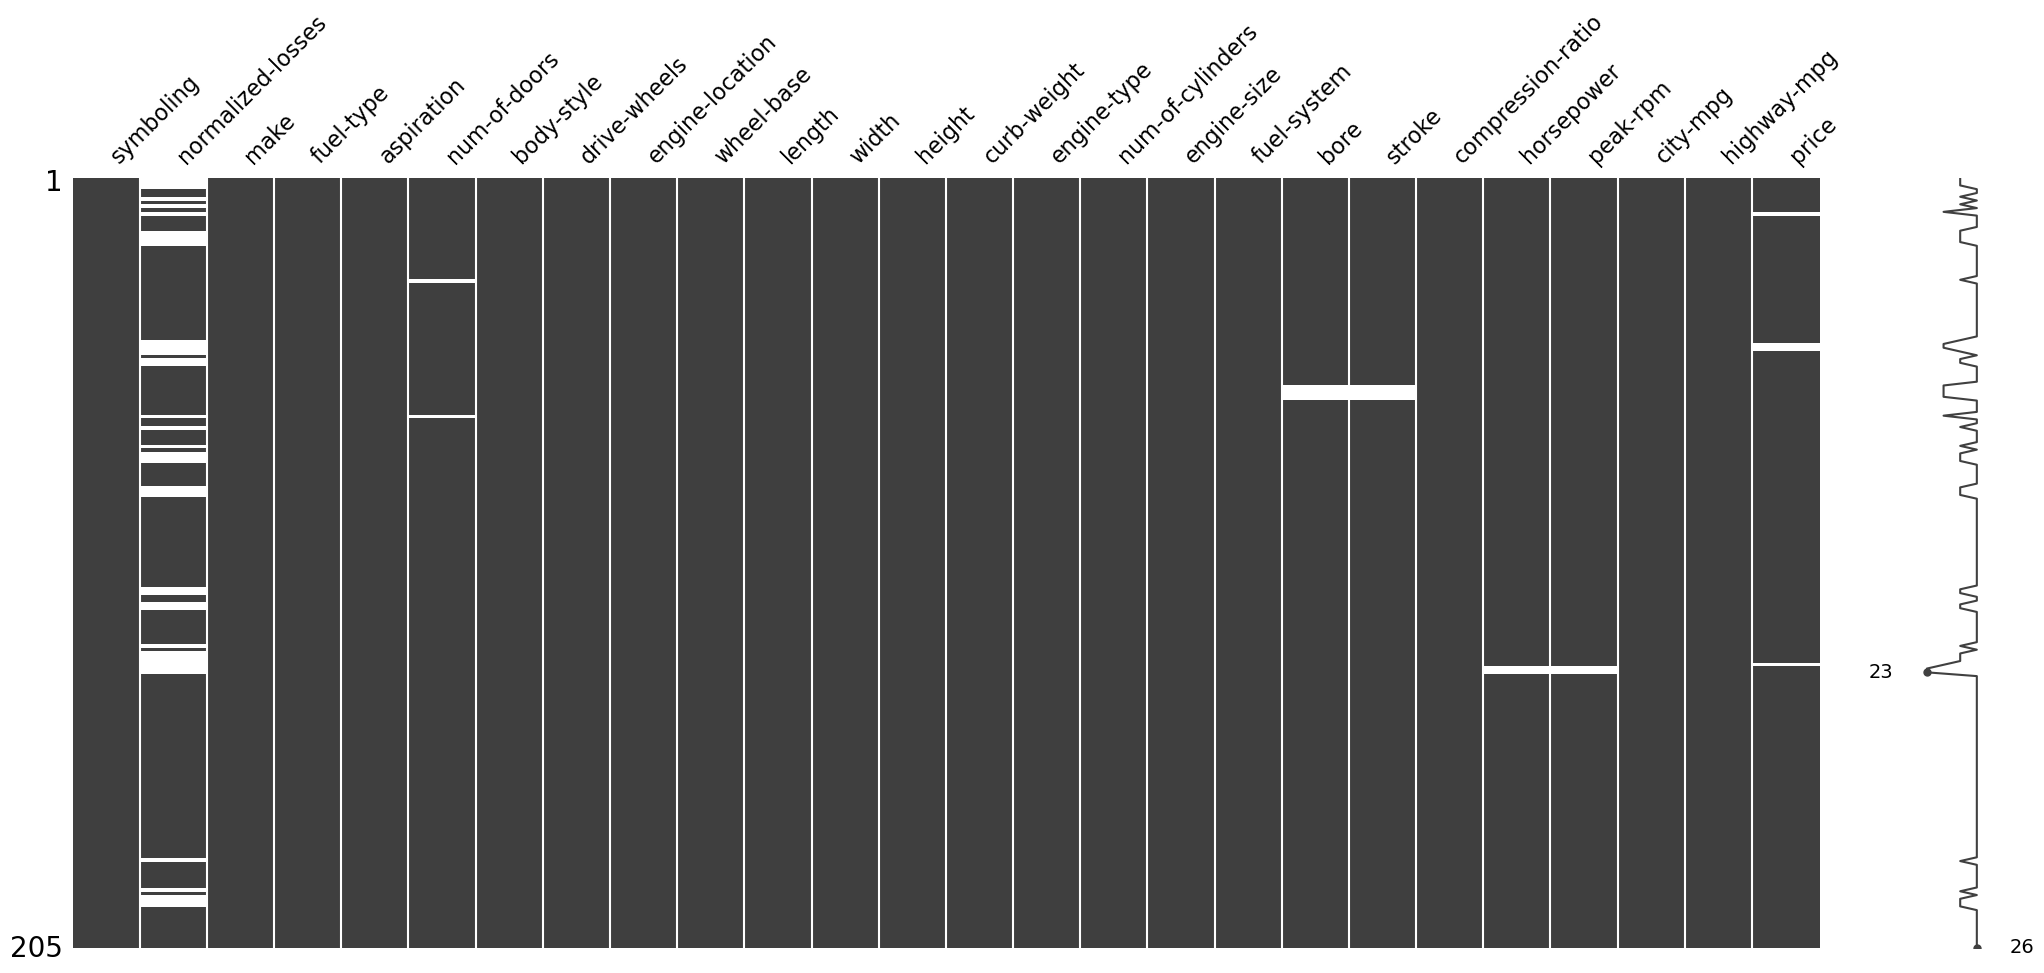


--- Missing Value Counts ---


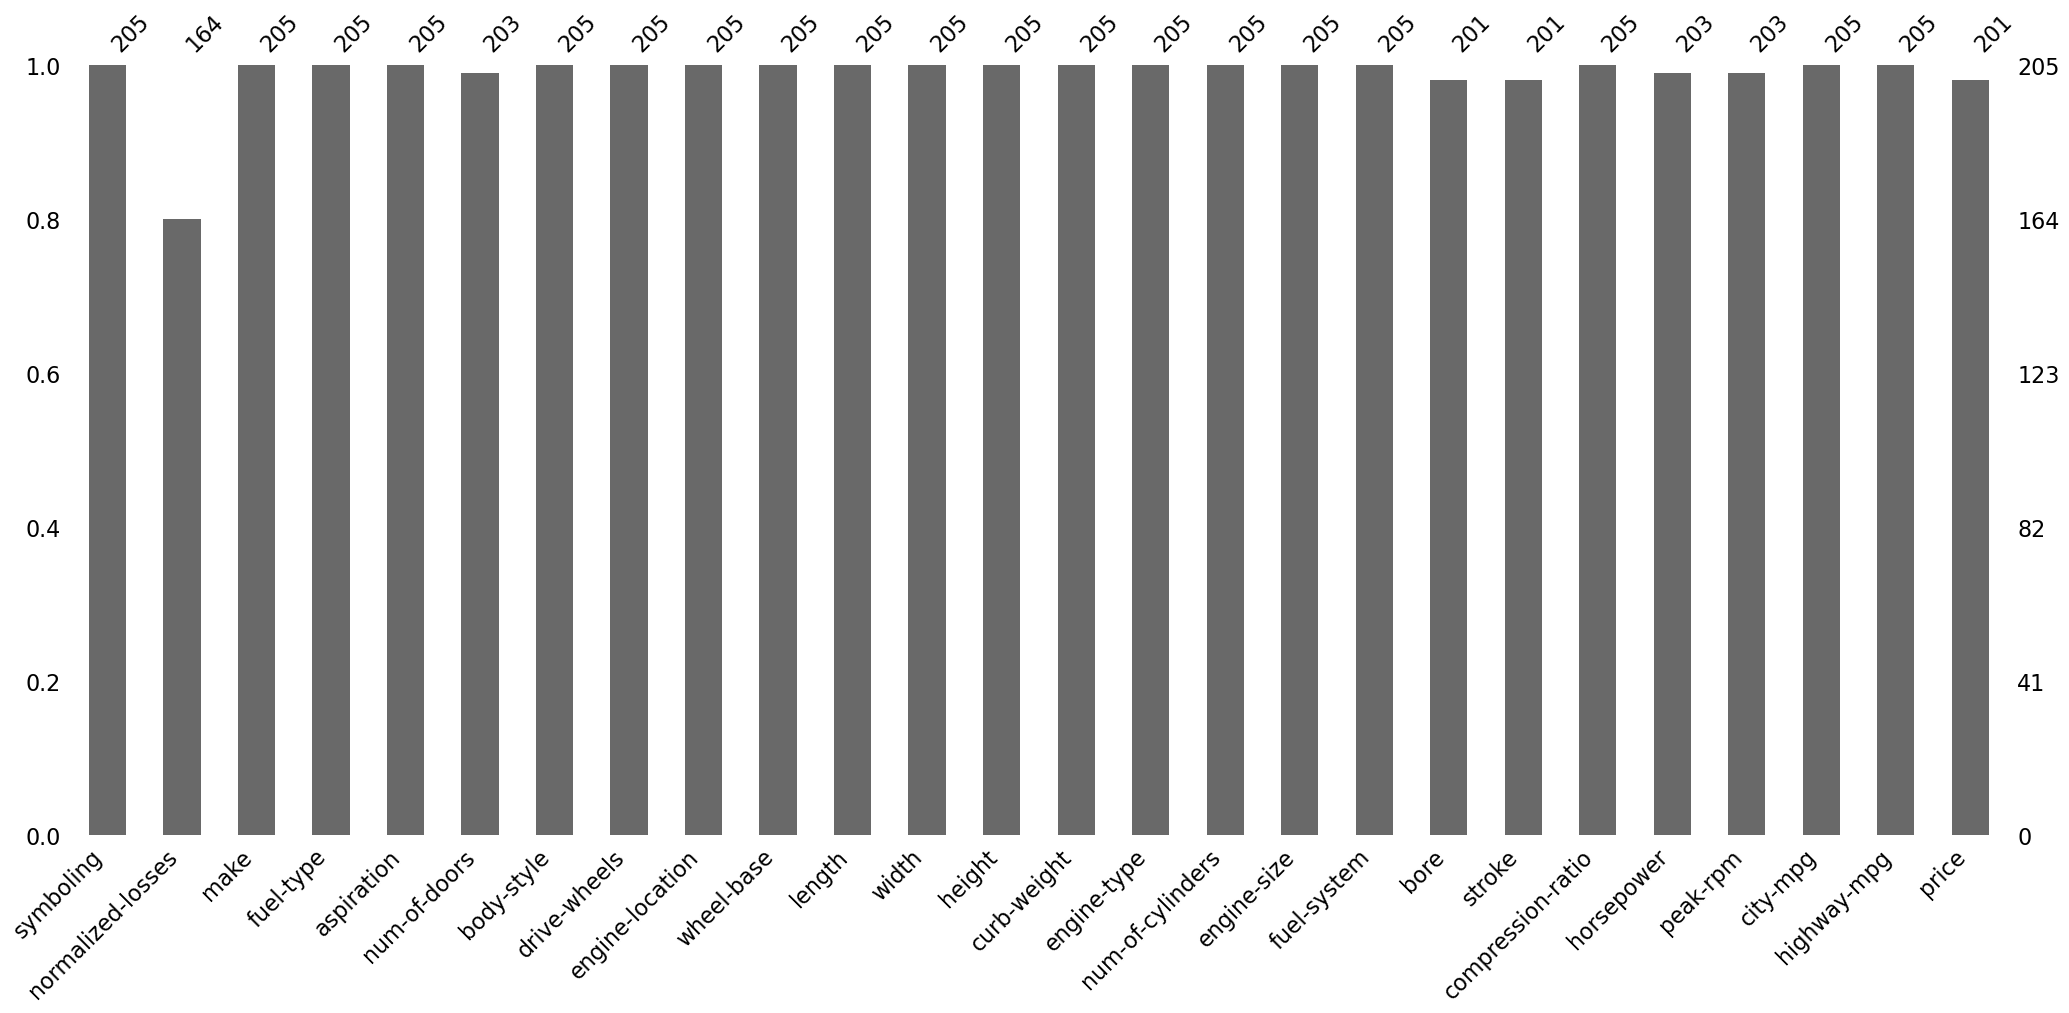


--- Correlation of Missing Values ---


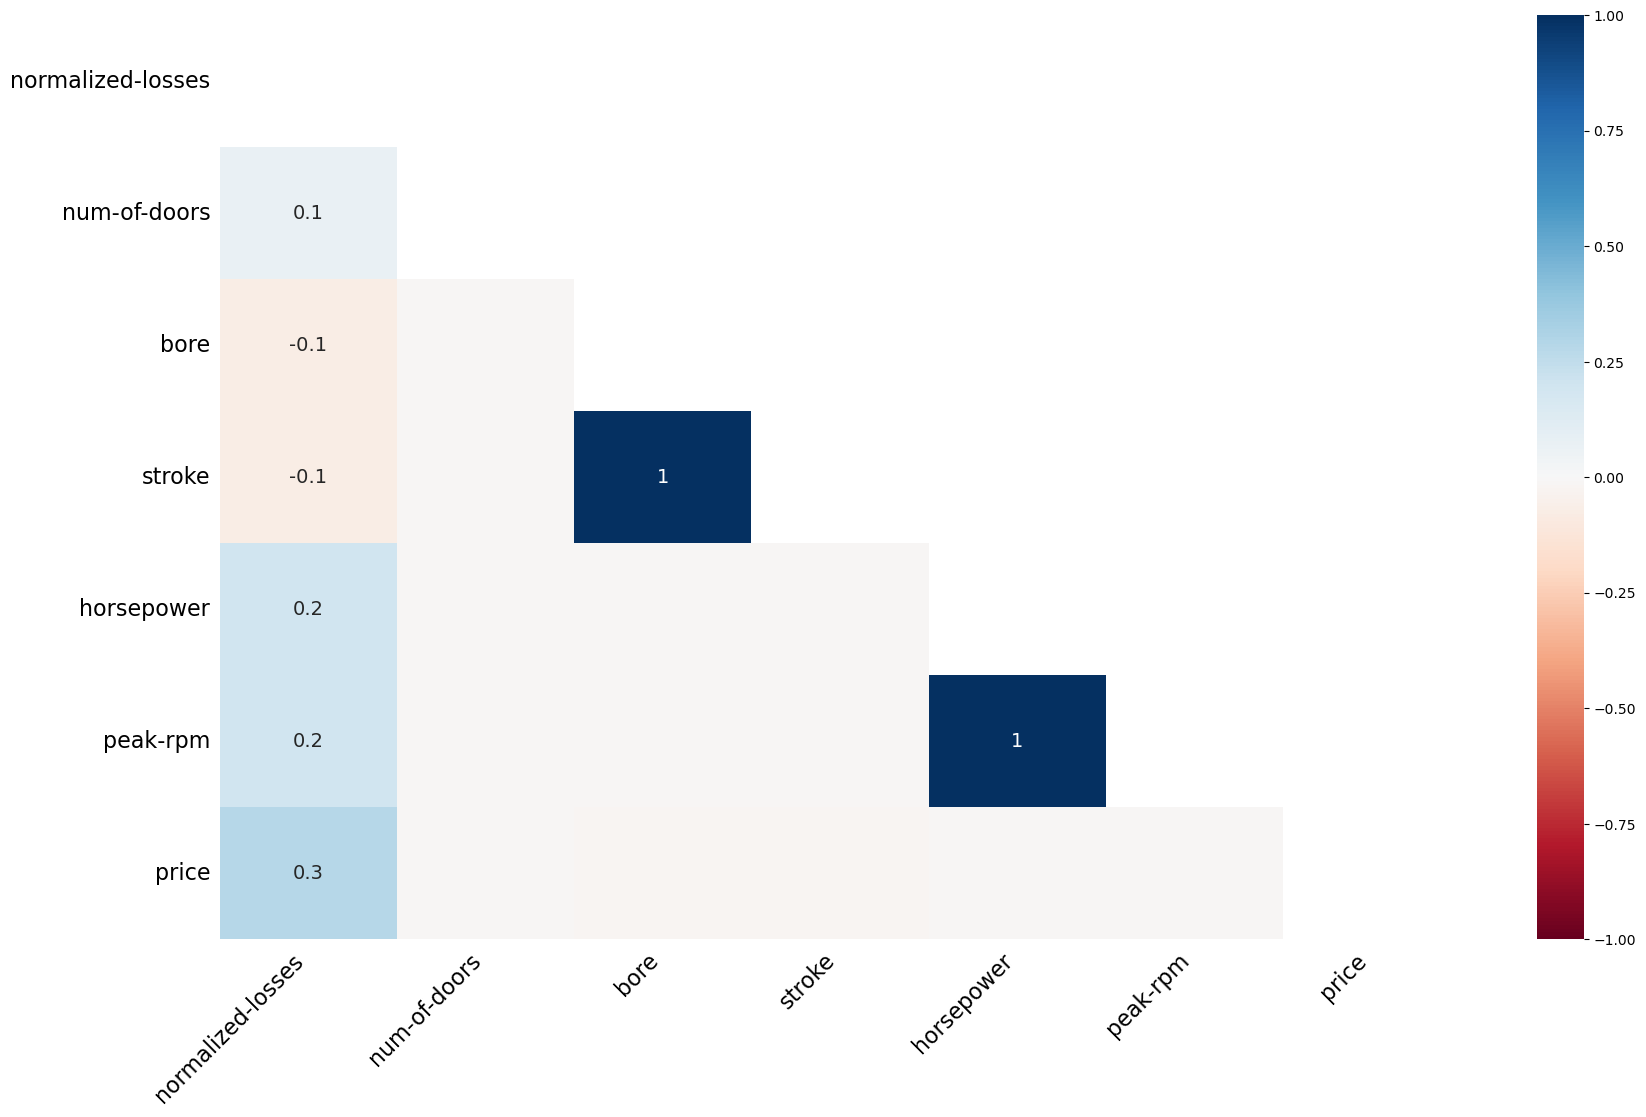

In [3]:
# Convert columns that should be numeric to a numeric type
# 'coerce' will turn any non-numeric value into NaN (Not a Number)
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 1. Matrix plot to see the pattern of missingness
print("--- Missing Value Matrix ---")
msno.matrix(data)
plt.show()

# 2. Bar chart of missing values
print("\n--- Missing Value Counts ---")
msno.bar(data)
plt.show()

# 3. Heatmap to see the correlation of missingness between columns
# A value near 1 means if one variable is missing, the other is likely missing too.
# A value near -1 means if one is missing, the other is likely present.
print("\n--- Correlation of Missing Values ---")
msno.heatmap(data)
plt.show()

In [6]:
# Import the necessary imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

print("--- Step 3: Imputing Missing Values using MICE ---")

# Separate columns by data type
numerical_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(include='object').columns

# --- 1. Impute Numerical Columns using MICE (IterativeImputer) ---
# This imputer predicts the missing values based on the other features.
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
data[numerical_cols] = mice_imputer.fit_transform(data[numerical_cols])
print("Numerical missing values imputed using MICE.")


# --- 2. Impute Categorical Columns using the Mode ---
# For categorical data, using the most frequent value (mode) is still a robust strategy.
mode_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = mode_imputer.fit_transform(data[categorical_cols])
print("Categorical missing values imputed using the mode.")


# --- 3. Verify that there are no missing values left ---
print("\nMissing values remaining after imputation:")
print(data.isnull().sum().sum())

--- Step 3: Imputing Missing Values using MICE ---
Numerical missing values imputed using MICE.
Categorical missing values imputed using the mode.

Missing values remaining after imputation:
0


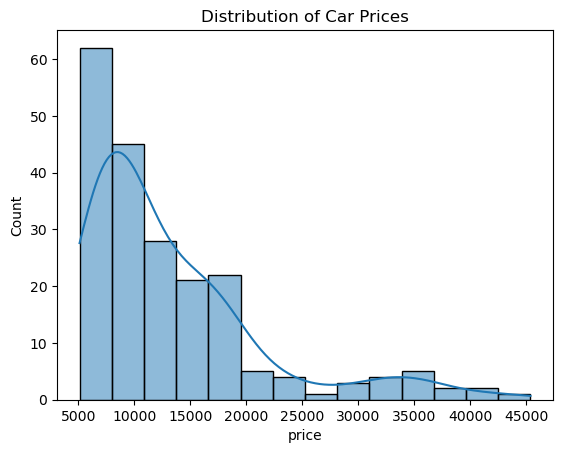

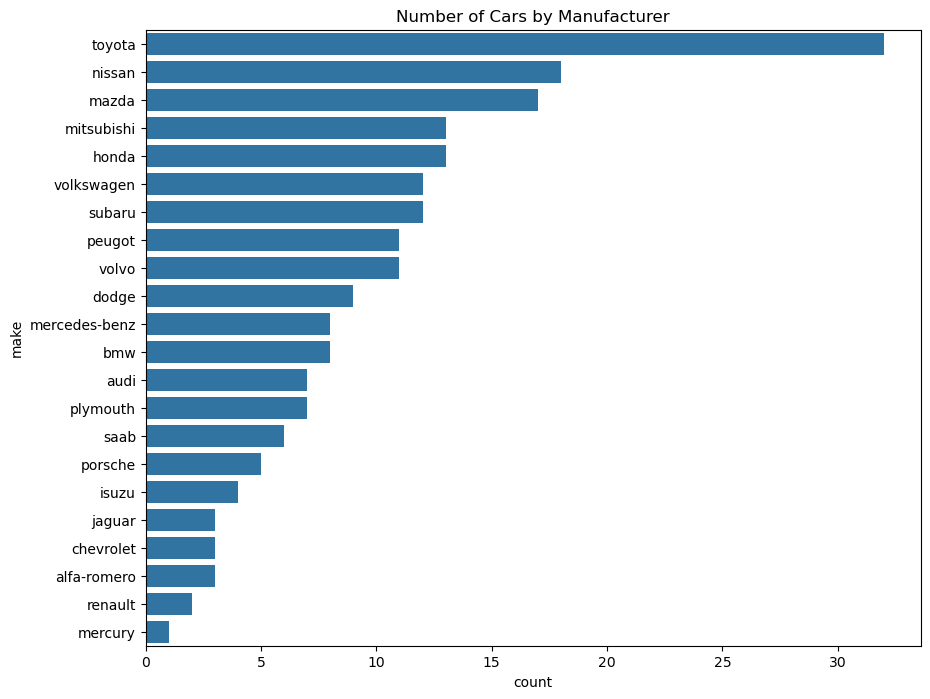

In [9]:
# Distribution of the target variable: price
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

# Count of cars by manufacturer
plt.figure(figsize=(10, 8))
sns.countplot(y='make', data=data, order=data['make'].value_counts().index)
plt.title('Number of Cars by Manufacturer')
plt.show()


Analyzing relationships between features...


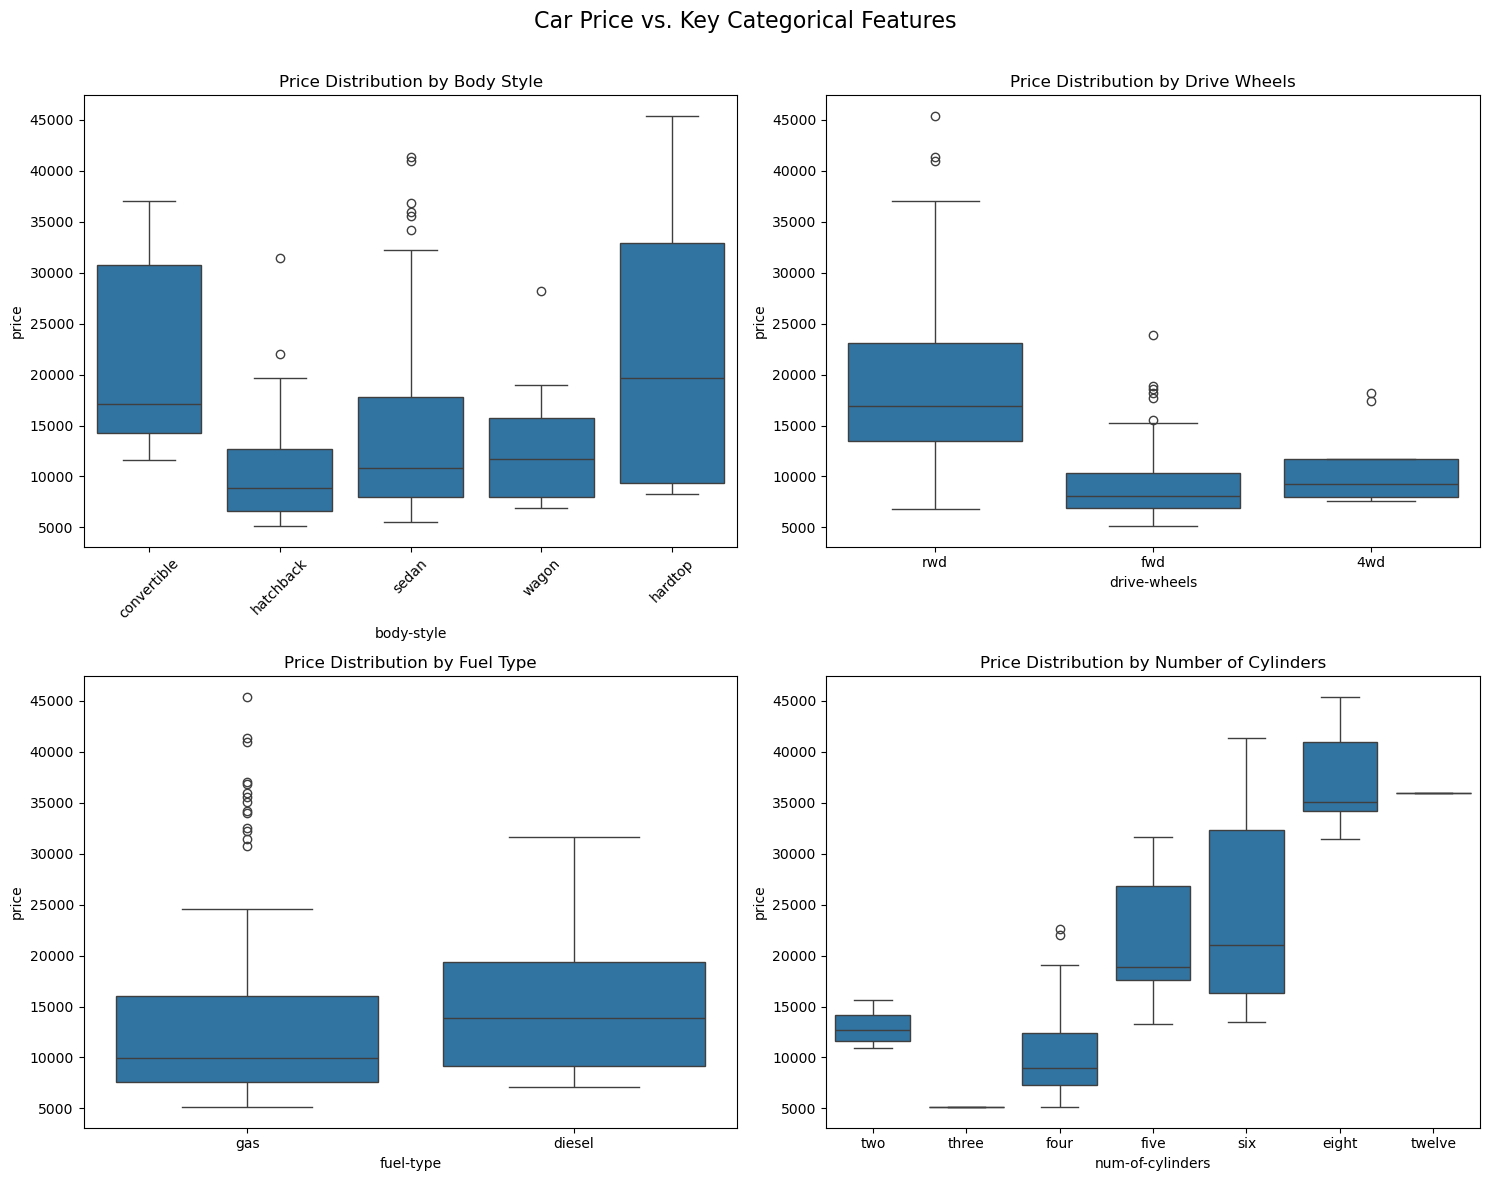


Generating pairplot for a deeper look at numerical relationships...


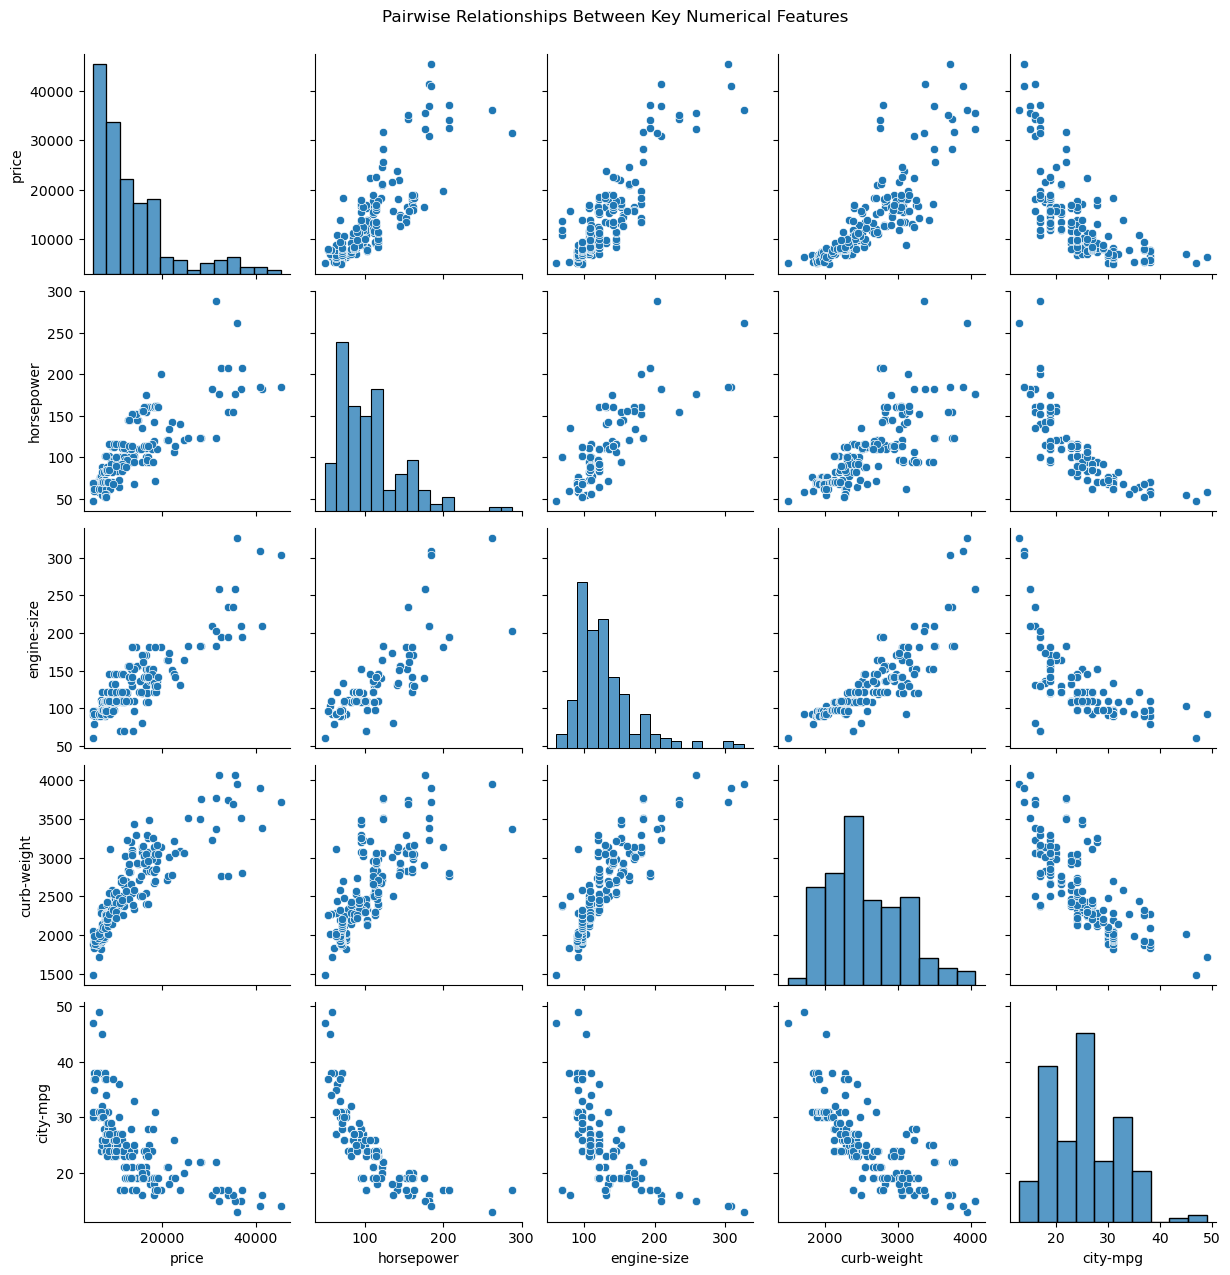


--- Expanded EDA Complete ---


In [11]:
# =============================================================================
# --- 2. EXPANDED BIVARIATE ANALYSIS ---
# =============================================================================
print("\nAnalyzing relationships between features...")

# --- Categorical vs. Numerical ---
# How do different categorical features affect the price?
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x='body-style', y='price', data=data)
plt.title('Price Distribution by Body Style')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='drive-wheels', y='price', data=data)
plt.title('Price Distribution by Drive Wheels')

plt.subplot(2, 2, 3)
sns.boxplot(x='fuel-type', y='price', data=data)
plt.title('Price Distribution by Fuel Type')

plt.subplot(2, 2, 4)
sns.boxplot(x='num-of-cylinders', y='price', data=data, order=['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'])
plt.title('Price Distribution by Number of Cylinders')
plt.suptitle('Car Price vs. Key Categorical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# --- Numerical vs. Numerical ---
# A pairplot is great for a quick overview of relationships
print("\nGenerating pairplot for a deeper look at numerical relationships...")
pairplot_cols = ['price', 'horsepower', 'engine-size', 'curb-weight', 'city-mpg']
sns.pairplot(data[pairplot_cols])
plt.suptitle('Pairwise Relationships Between Key Numerical Features', y=1.02)
plt.show()

print("\n--- Expanded EDA Complete ---")

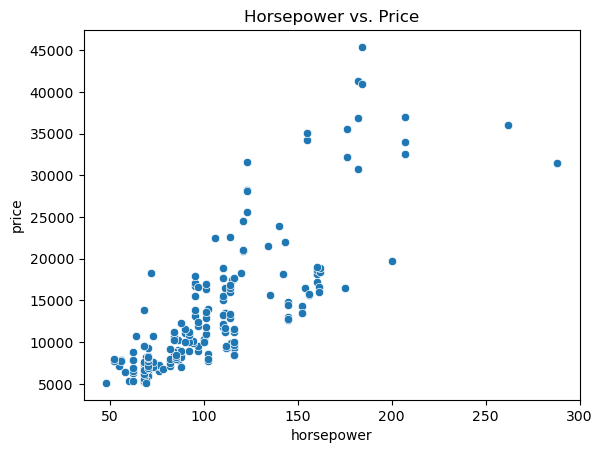

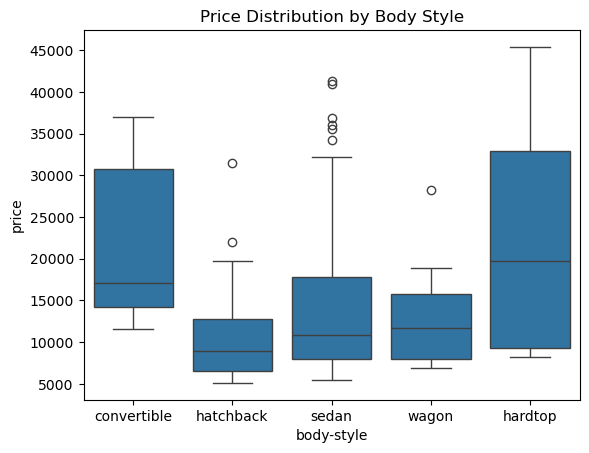

In [13]:
# Horsepower vs. Price
sns.scatterplot(x='horsepower', y='price', data=data)
plt.title('Horsepower vs. Price')
plt.show()

# Body Style vs. Price
sns.boxplot(x='body-style', y='price', data=data)
plt.title('Price Distribution by Body Style')
plt.show()

--- Step 5a: Detecting and Visualizing Outliers ---


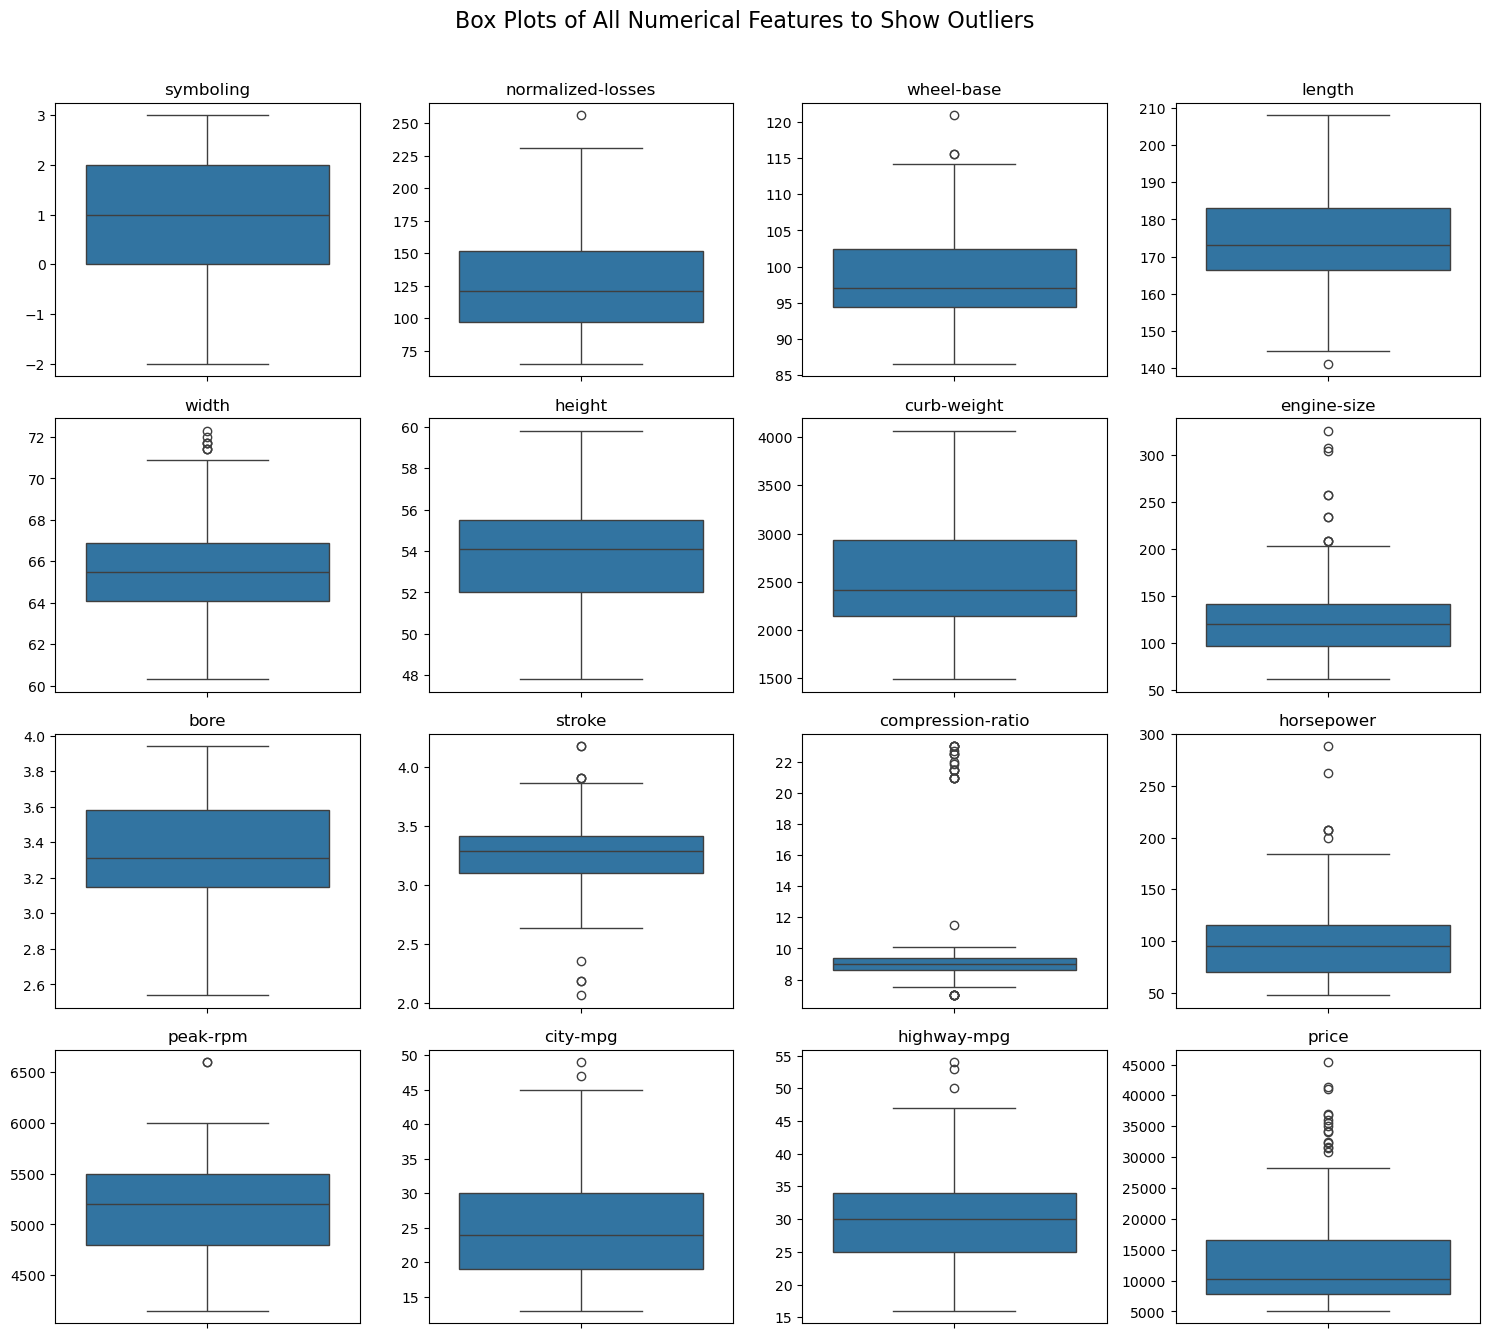

--- Step 5a: Detecting and Visualizing Outliers ---


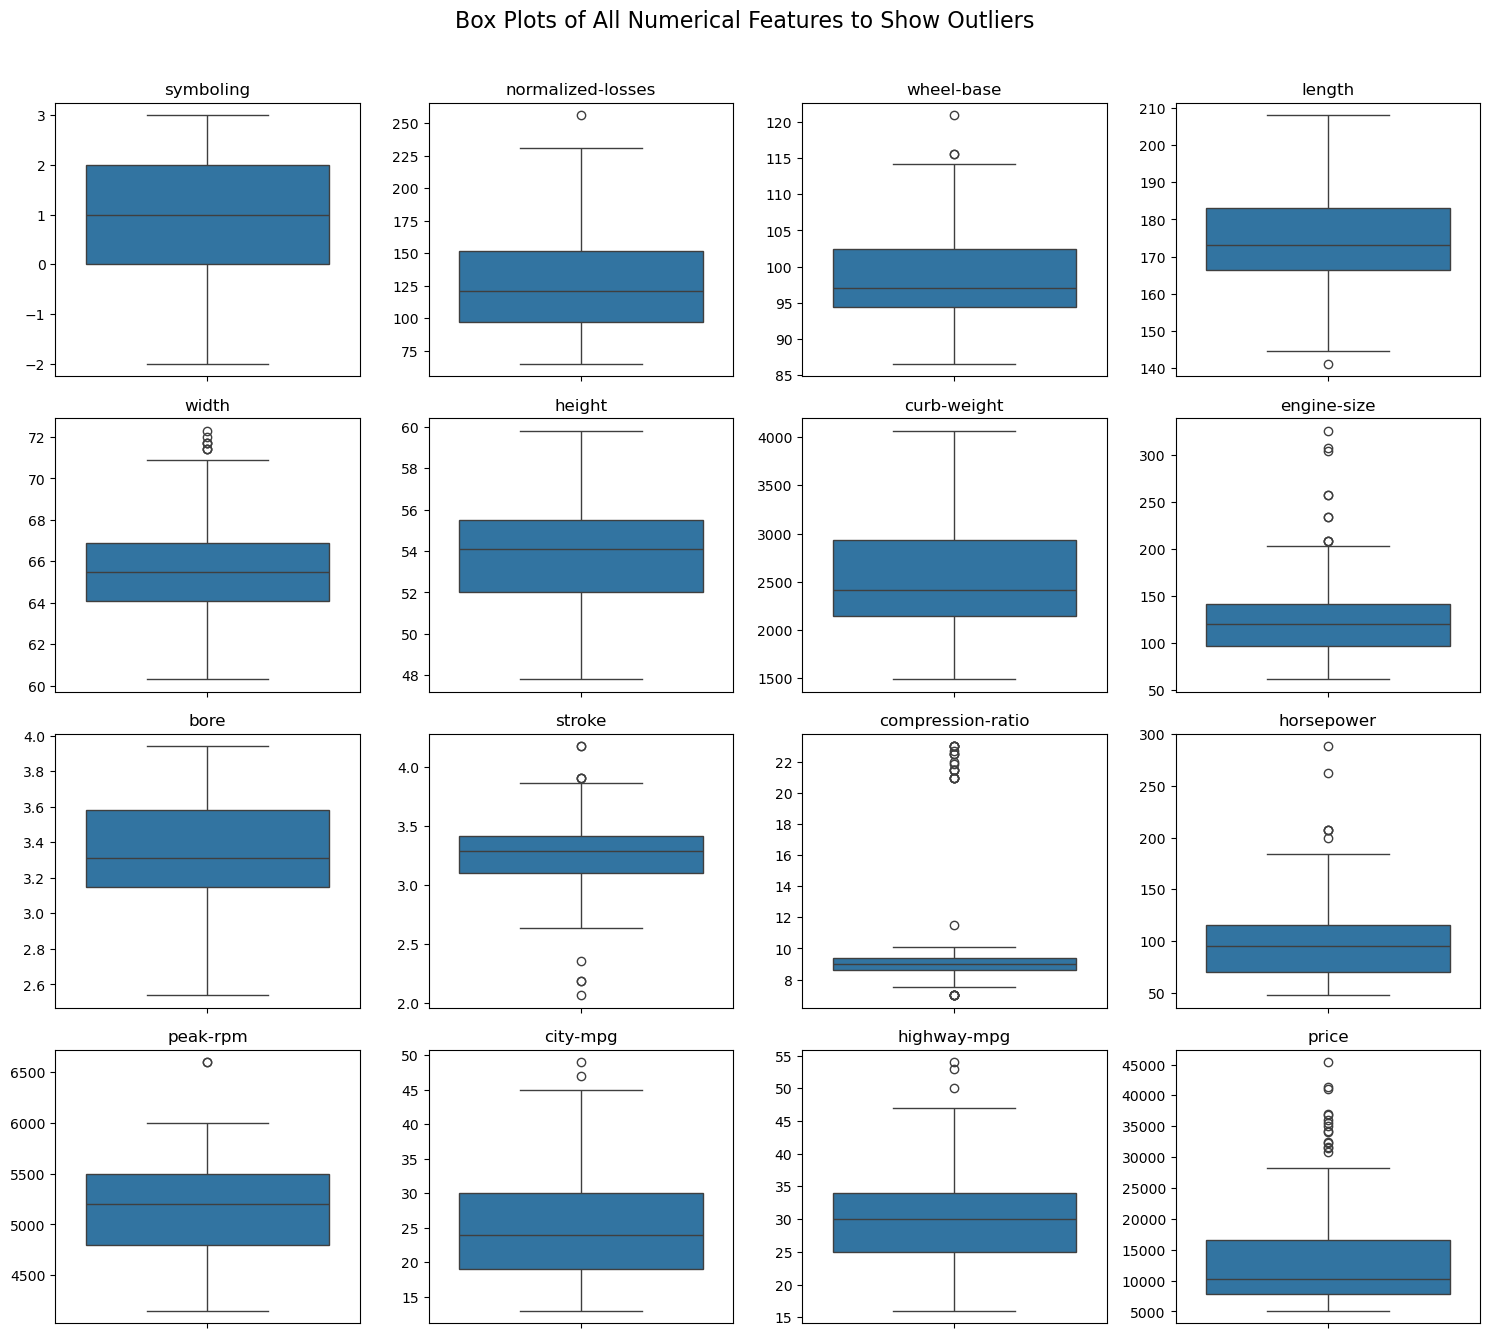

In [15]:

# =============================================================================
# --- 5a. Detecting and Visualizing Outliers ---
# =============================================================================
print("--- Step 5a: Detecting and Visualizing Outliers ---")

# First, select only the columns with numerical data
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Create box plots for each numerical column to see the outliers
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i + 1) # Create a grid of plots
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.ylabel('')
plt.suptitle('Box Plots of All Numerical Features to Show Outliers', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
# =============================================================================
# --- 5a. Detecting and Visualizing Outliers ---
# =============================================================================
print("--- Step 5a: Detecting and Visualizing Outliers ---")

# First, select only the columns with numerical data
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Create box plots for each numerical column to see the outliers
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i + 1) # Create a grid of plots
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.ylabel('')
plt.suptitle('Box Plots of All Numerical Features to Show Outliers', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

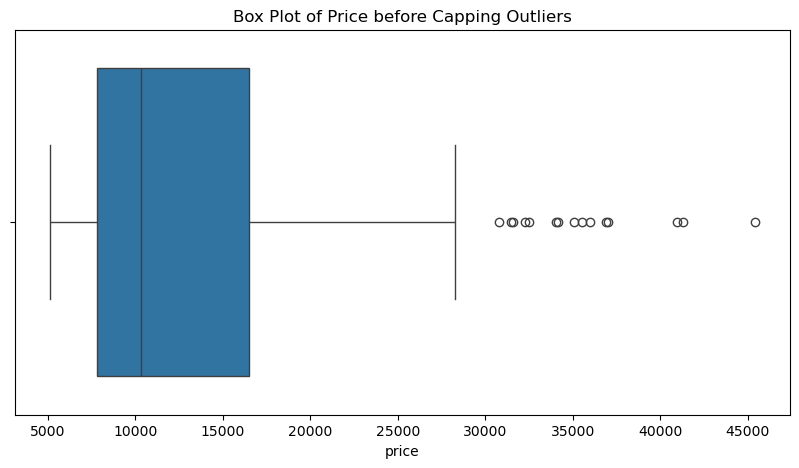

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['price'])
plt.title('Box Plot of Price before Capping Outliers')
plt.show()


--- Step 5b: Handling Outliers ---
Outliers in all numerical columns have been handled by capping.


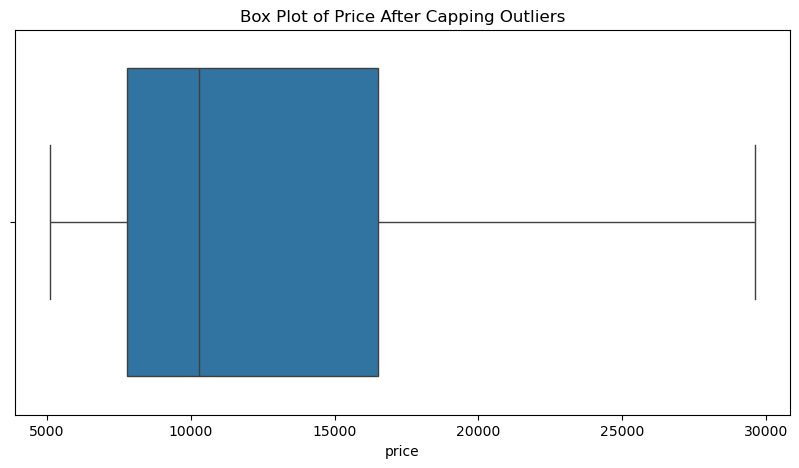

In [19]:
# =============================================================================
# --- 5b. Handling Outliers by Capping ---
# =============================================================================
print("\n--- Step 5b: Handling Outliers ---")

# Loop through each numerical column to cap outliers
for col in numerical_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the values in the column at the defined boundaries
    data[col] = np.clip(data[col], lower_bound, upper_bound)

print("Outliers in all numerical columns have been handled by capping.")

# --- Visualize the Result to Confirm ---
# Let's look at the box plot for 'price' again to see the difference.
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['price'])
plt.title('Box Plot of Price After Capping Outliers')
plt.show()

In [17]:
# Separate features (X) and target (y)
X = data.drop('price', axis=1)
y = data['price']

# Convert categorical variables into dummy/indicator variables
# drop_first=True avoids perfect correlation between features
X = pd.get_dummies(X, drop_first=True)

print("Categorical variables have been one-hot encoded.")
print(f"New shape of features (X): {X.shape}")
display(X.head())

Categorical variables have been one-hot encoded.
New shape of features (X): (205, 65)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,165.077913,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3.0,168.011578,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1.0,136.683116,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2.0,164.000000,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2.0,164.000000,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


--- Model successfully fitted! ---


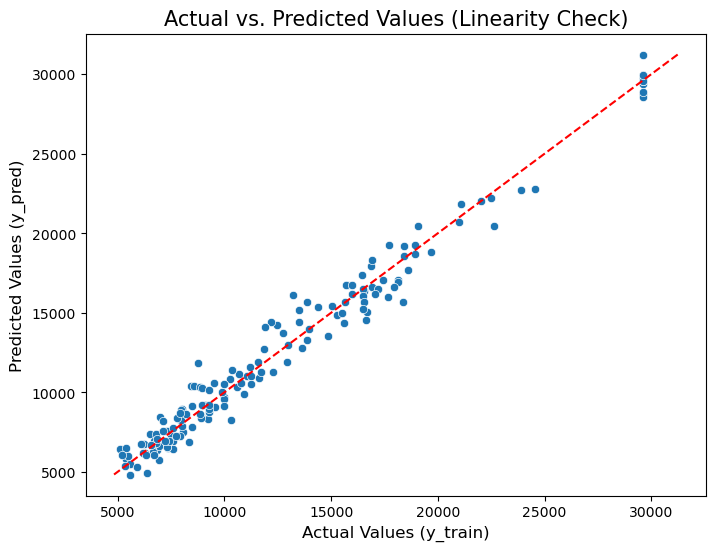


--- Checking Assumption 2: Independence of Residuals ---


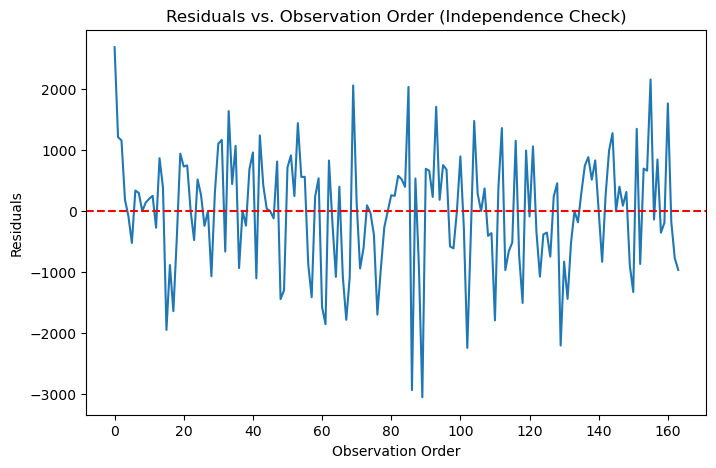

Check: The points should be random, with no clear pattern like a wave or a consistent trend.

--- Checking Assumption 3: Homoscedasticity ---


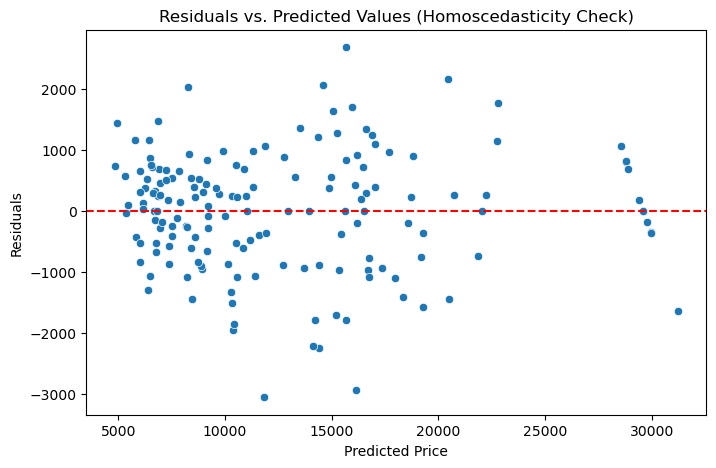

Check: The points should be scattered randomly in a constant-width band. A funnel or cone shape is bad.

--- Checking Assumption 4: Normality of Residuals ---


<Figure size 800x500 with 0 Axes>

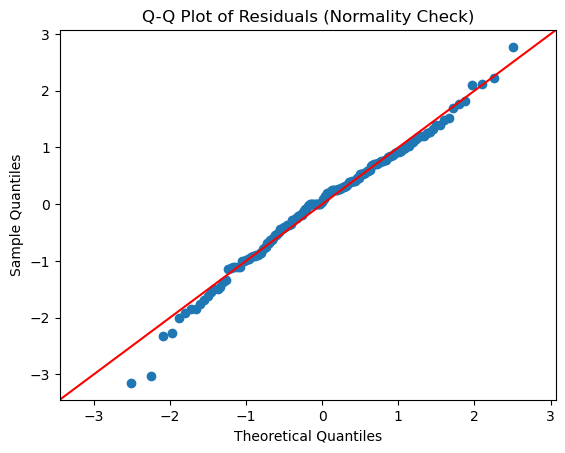

Check: The blue dots should follow the red diagonal line as closely as possible.

--- Checking Assumption 5: No Severe Multicollinearity ---


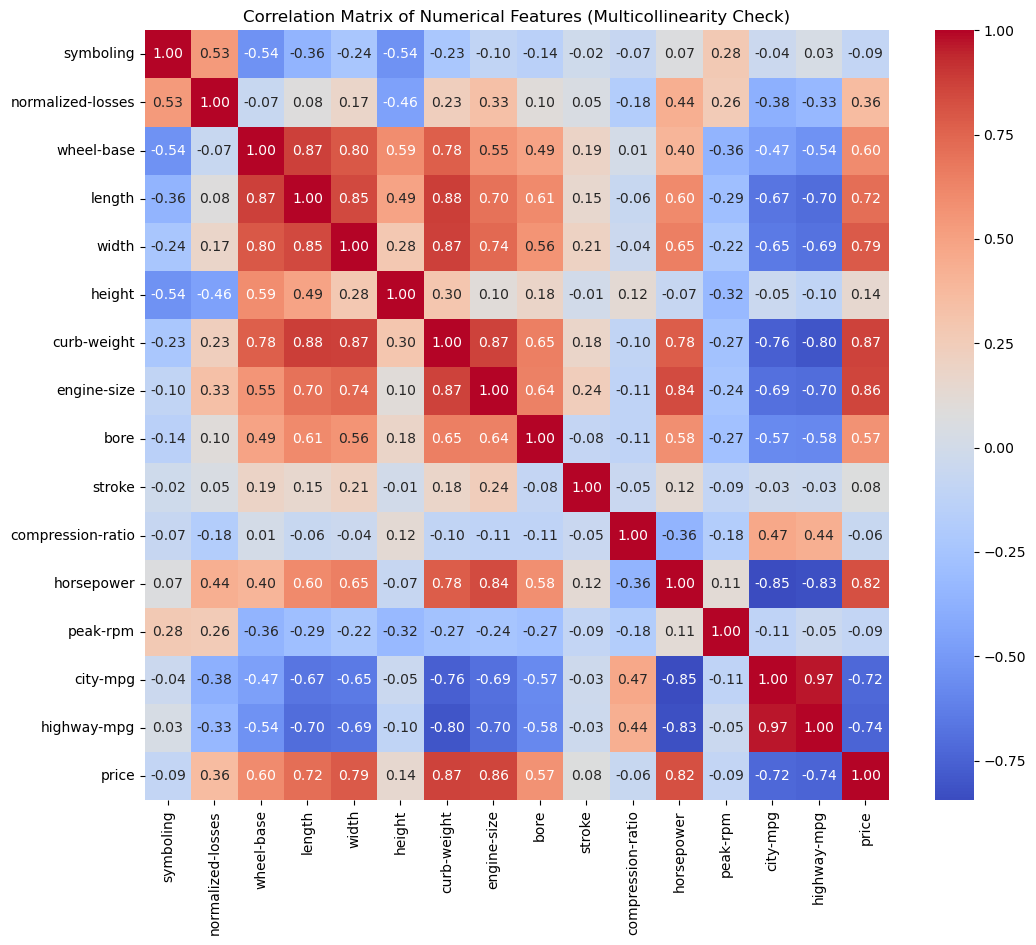

Check: The correlation values between different features (off the diagonal) should ideally be low (e.g., below 0.8). High values (like >0.9) indicate a problem.


In [23]:
# This turns text categories into numbers (0s and 1s)
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Fit the Multiple Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)
print("--- Model successfully fitted! ---")

# --- 3. Get Predictions and Residuals ---
# Residuals are the errors of the model (Actual Value - Predicted Value)
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train

# =============================================================================
# --- 4. Check the 5 Assumptions ---
# =============================================================================

## Assumption 1: Linearity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_pred_train)

# Add a 45-degree line for reference (represents a perfect prediction)
# 'p1' and 'p2' are the start and end points for the line
p1 = max(max(y_pred_train), max(y_train))
p2 = min(min(y_pred_train), min(y_train))
plt.plot([p1, p2], [p1, p2], 'r--')

plt.title('Actual vs. Predicted Values (Linearity Check)', fontsize=15)
plt.xlabel('Actual Values (y_train)', fontsize=12)
plt.ylabel('Predicted Values (y_pred)', fontsize=12)
plt.show()

## Assumption 2: Independence of Residuals
print("\n--- Checking Assumption 2: Independence of Residuals ---")
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(residuals)), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Observation Order (Independence Check)')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.show()
print("Check: The points should be random, with no clear pattern like a wave or a consistent trend.")

## Assumption 3: Homoscedasticity (Constant Variance)
print("\n--- Checking Assumption 3: Homoscedasticity ---")
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_train, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()
print("Check: The points should be scattered randomly in a constant-width band. A funnel or cone shape is bad.")

## Assumption 4: Normality of Residuals
print("\n--- Checking Assumption 4: Normality of Residuals ---")
plt.figure(figsize=(8, 5))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Normality Check)')
plt.show()
print("Check: The blue dots should follow the red diagonal line as closely as possible.")

## Assumption 5: No Severe Multicollinearity
print("\n--- Checking Assumption 5: No Severe Multicollinearity ---")
# We check this on the original feature set before splitting
plt.figure(figsize=(12, 10))
correlation_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features (Multicollinearity Check)')
plt.show()
print("Check: The correlation values between different features (off the diagonal) should ideally be low (e.g., below 0.8). High values (like >0.9) indicate a problem.")

In [27]:
# =============================================================================
# --- 8. Metrics for Multiple Linear Regression ---
# =============================================================================
print("--- 8. Metrics for Multiple Linear Regression ---")

# Make predictions on both training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate scores
train_score_r2 = r2_score(y_train, y_pred_train)
test_score_r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train Score (R²): {train_score_r2:.4f}")
print(f"Test Score (R²): {test_score_r2:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")


--- 8. Metrics for Multiple Linear Regression ---
Train Score (R²): 0.9783
Test Score (R²): 0.9324
Root Mean Squared Error (RMSE): $1,907.64


In [29]:
# --- 9. Feature Scaling ---
# =============================================================================
print("\n--- 9. Scaling Features ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Training and testing data have been scaled.")


--- 9. Scaling Features ---
Training and testing data have been scaled.


In [39]:
# --- Set up the model and hyperparameter grid ---
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 50.0, 100.0]}

# --- Use GridSearchCV to find the best alpha ---
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search_ridge.fit(X_train_scaled, y_train)

# --- Check for Overfitting and Evaluate ---
best_ridge = grid_search_ridge.best_estimator_
best_index = grid_search_ridge.best_index_

train_score = grid_search_ridge.cv_results_['mean_train_score'][best_index]
validation_score = grid_search_ridge.cv_results_['mean_test_score'][best_index]

y_pred_test = best_ridge.predict(X_test_scaled)
test_score = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n--- Ridge Regression Results ---")
print(f"Best alpha found: {grid_search_ridge.best_params_}")
print(f"Train Score (R²): {train_score:.4f}")
print(f"Validation Score (R²): {validation_score:.4f}")
print(f"Test Score (R²): {test_score:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

if train_score > validation_score + 0.05:
    print("Status: Potential overfitting detected.")
else:
    print("Status: Model appears to be well-fit.")


--- Ridge Regression Results ---
Best alpha found: {'alpha': 10.0}
Train Score (R²): 0.9719
Validation Score (R²): 0.9301
Test Score (R²): 0.9329
Root Mean Squared Error (RMSE): $1,901.46
Status: Model appears to be well-fit.


In [41]:
# --- Set up the model and hyperparameter grid ---
tree = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [2, 4, 6]
}

# --- Use GridSearchCV to find the best settings ---
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search_tree.fit(X_train_scaled, y_train)

# --- Check for Overfitting and Evaluate ---
best_tree = grid_search_tree.best_estimator_
best_index = grid_search_tree.best_index_

train_score = grid_search_tree.cv_results_['mean_train_score'][best_index]
validation_score = grid_search_tree.cv_results_['mean_test_score'][best_index]

y_pred_test = best_tree.predict(X_test_scaled)
test_score = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n--- Decision Tree Results ---")
print(f"Best hyperparameters found: {grid_search_tree.best_params_}")
print(f"Train Score (R²): {train_score:.4f}")
print(f"Validation Score (R²): {validation_score:.4f}")
print(f"Test Score (R²): {test_score:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

if train_score > validation_score + 0.05:
    print("Status: Potential overfitting detected.")
else:
    print("Status: Model appears to be well-fit.")


--- Decision Tree Results ---
Best hyperparameters found: {'max_depth': 5, 'min_samples_leaf': 4}
Train Score (R²): 0.9560
Validation Score (R²): 0.8528
Test Score (R²): 0.9103
Root Mean Squared Error (RMSE): $2,198.29
Status: Potential overfitting detected.


In [45]:
# --- Set up the model and hyperparameter grid ---
forest = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [5,10,15]
}

# --- Use GridSearchCV to find the best settings ---
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='r2', return_train_score=True, n_jobs=-1)
grid_search_forest.fit(X_train_scaled, y_train)

# --- Check for Overfitting and Evaluate ---
best_forest = grid_search_forest.best_estimator_
best_index = grid_search_forest.best_index_

train_score = grid_search_forest.cv_results_['mean_train_score'][best_index]
validation_score = grid_search_forest.cv_results_['mean_test_score'][best_index]

y_pred_test = best_forest.predict(X_test_scaled)
test_score = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n--- Random Forest Results ---")
print(f"Best hyperparameters found: {grid_search_forest.best_params_}")
print(f"Train Score (R²): {train_score:.4f}")
print(f"Validation Score (R²): {validation_score:.4f}")
print(f"Test Score (R²): {test_score:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

if train_score > validation_score + 0.05:
    print("Status: Potential overfitting detected.")
else:
    print("Status: Model appears to be well-fit.")


--- Random Forest Results ---
Best hyperparameters found: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 150}
Train Score (R²): 0.9514
Validation Score (R²): 0.8573
Test Score (R²): 0.9487
Root Mean Squared Error (RMSE): $1,662.48
Status: Potential overfitting detected.
